Name:-Amanuel Lefebo
Album Number:-55185

In [25]:
import opendatasets as od
import pandas
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Conv2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image  import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [26]:
od.download('https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  amanuellefebo


Your Kaggle Key:

  ········


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri


100%|██████████| 86.8M/86.8M [00:04<00:00, 19.0MB/s]


In [31]:
train_path=[]
cat_1=[]
image_dir='brain-tumor-classification-mri/Training'
for i in os.listdir(image_dir):
    
    folderpath=os.path.join(image_dir,i)
    for ele in os.listdir(folderpath):
        train_path.append(os.path.join(folderpath,ele))
        cat_1.append(i)



    
    
    

        
       
    
    
    
        

        
        

In [4]:
test_path=[]
cat_2=[]
image_dir='brain-tumor-classification-mri/Testing'
for i in os.listdir(image_dir):
    print(i)
    folderpath=os.path.join(image_dir,i)
    for ele in os.listdir(folderpath):
        test_path.append(os.path.join(folderpath,ele))
        cat_2.append(i)
    

        
       
    
    
    
        

        
        

glioma_tumor
meningioma_tumor
no_tumor
pituitary_tumor


In [32]:
df=pd.DataFrame()
df['input_path']=train_path
df['category']=cat_1

In [43]:
df.groupby(df.category).nunique()

,input_path
category,
glioma_tumor,826
meningioma_tumor,822
no_tumor,396
pituitary_tumor,828


In [13]:
df.isna().sum()

input_path    0
category      0
dtype: int64

In [44]:
df.describe()

,input_path,category
count,2872,2872
unique,2872,4
top,brain-tumor-classification-mri/Training\glioma...,pituitary_tumor
freq,1,828


In [45]:
test_data=pd.DataFrame()

In [46]:
test_data['input_path']=test_path
test_data['category']=cat_2

In [47]:
test_data=test_data.sample(frac=1).reset_index(drop=True)

In [48]:
df = df.sample(frac=1).reset_index(drop=True)

In [53]:
test_data.isna().sum()

input_path    0
category      0
dtype: int64

In [52]:
test_data.head()

,input_path,category
0,brain-tumor-classification-mri/Testing\no_tumo...,no_tumor
1,brain-tumor-classification-mri/Testing\glioma_...,glioma_tumor
2,brain-tumor-classification-mri/Testing\glioma_...,glioma_tumor
3,brain-tumor-classification-mri/Testing\pituita...,pituitary_tumor
4,brain-tumor-classification-mri/Testing\meningi...,meningioma_tumor


In [56]:
test_data.groupby(test_data['category']).nunique()

,input_path
category,
glioma_tumor,101
meningioma_tumor,115
no_tumor,105
pituitary_tumor,74


Let us Visualize the first image data set in our directory both for train and test data set

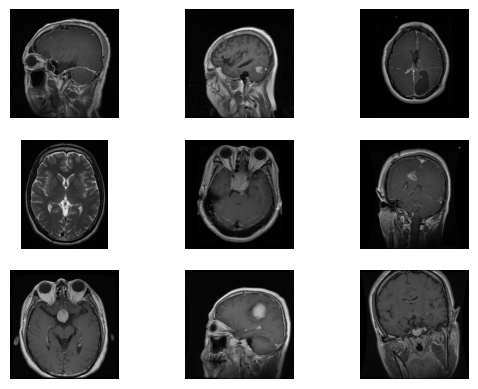

In [10]:
for i,ele in enumerate(df['input_path'][0:9]):
  img=load_img(ele)
  imG=np.array(img)
  plt.subplot(3,3,i+1)
  plt.imshow(img)
  plt.axis('off')

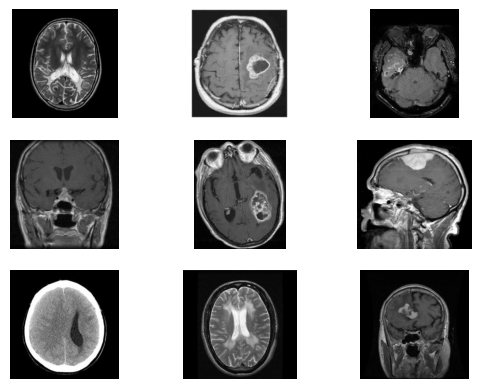

In [59]:
for i,ele in enumerate(test_data['input_path'][0:9]):
  img=load_img(ele)
  imG=np.array(img)
  plt.subplot(3,3,i+1)
  plt.imshow(img)
  plt.axis('off')
  plt.savefig('test_data.png')

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [60]:
train_gen= ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_gen= ImageDataGenerator(rescale=1./255)

In [61]:
train_data=train_gen.flow_from_dataframe(df,x_col='input_path',y_col='category',target_size=(180,180),batch_size=64,shuffle=True,class_mode='categorical')
val_data=test_gen.flow_from_dataframe(test_data,x_col='input_path',y_col='category',target_size=(180,180),batch_size=64,shuffle=True,class_mode='categorical')

Found 2870 validated image filenames belonging to 4 classes.
Found 394 validated image filenames belonging to 4 classes.


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="input_path". These filename(s) will be ignored.
  warnings.warn(
C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="input_path". These filename(s) will be ignored.
  warnings.warn(


In [62]:
train_data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [97]:
# define input shape
if tf.keras.backend.image_data_format() == 'channels_first':
    input_shape = (3, 180, 180)
else:
    input_shape = (180,180, 3)

In [98]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Dense layers
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  # 4 output units for 4 categories


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [109]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [110]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 87, 87, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 41, 41, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,036,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           404 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169,032 (4.46 MB)

 Trainable params: 1,168,256 (4.46 MB)

 Non-trainable params: 776 (3.03 KB)

In [111]:
#In fit_generator(), you don't pass the x and y directly, instead they come from a gene
model.fit(train_data,epochs=100,validation_data=val_data)

Epoch 1/100


C:\Users\ritaj\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.5028 - loss: 1.5544 - val_accuracy: 0.2538 - val_loss: 8.5613
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6529 - loss: 0.8922 - val_accuracy: 0.2538 - val_loss: 17.7204
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7058 - loss: 0.7880 - val_accuracy: 0.2538 - val_loss: 17.9185
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7219 - loss: 0.7209 - val_accuracy: 0.2538 - val_loss: 17.1550
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7636 - loss: 0.6338 - val_accuracy: 0.2259 - val_loss: 10.4561
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7834 - loss: 0.5816 - val_accuracy: 0.1954 - val_loss: 4.5606
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7934 - loss: 0.5213 - val_accuracy: 0.2056 - val_loss: 4.6038
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7973 - loss: 0.5184 - val_accuracy: 0.3147 - val_loss

In [112]:
model.save('Tumor_classifier_fin.h5')

In [63]:
mod=load_model('Tumor_classifier_fin.h5')

In [65]:
mod.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','classification_report'])

In [66]:
def pred(img_path):
    img = load_img(img_path,target_size=(180,180))
    img=np.array(img)
    img= img/255.0
    img=img.reshape(1,180,180,3)
    pred=mod.predict(img)
    pred=np.argmax(pred)
    if pred==0:
        return 'glioma_tumor'
    elif pred==1:
        return 'meningioma_tumor'
    elif pred==2:
        return 'no_tumor'
    else:
        return 'pituitary_tumor'
    

In [29]:
train_data.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [67]:
def result():
    predict=[]
    original=[]
    for i in range(395):
        try:
            predict.append(pred(test_data['input_path'][i]))
            original.append(test_data['category'][i])
        except:
            pass
    res_df=pd.DataFrame()
    res_df['original_image']=original
    res_df['prediction_result']=predict
    return res_df
    

In [68]:
pd.set_option('display.max_rows',None)

In [ ]:
final=pd.DataFrame(result())

In [72]:
final.head()

,original_image,prediction_result
0,no_tumor,no_tumor
1,glioma_tumor,meningioma_tumor
2,glioma_tumor,meningioma_tumor
3,pituitary_tumor,pituitary_tumor
4,meningioma_tumor,meningioma_tumor


In [77]:
len(final[final.original_image==final.prediction_result])

300

In [78]:
final

,original_image,prediction_result
0,no_tumor,no_tumor
1,glioma_tumor,meningioma_tumor
2,glioma_tumor,meningioma_tumor
3,pituitary_tumor,pituitary_tumor
4,meningioma_tumor,meningioma_tumor
5,meningioma_tumor,meningioma_tumor
6,no_tumor,no_tumor
7,no_tumor,no_tumor
8,glioma_tumor,glioma_tumor
9,no_tumor,no_tumor
